In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
# import the dataset from specified location
data=pd.read_excel(r'C:\Users\Route\Desktop\CCPP\Folds5x2_pp.xlsx')

In [6]:
data.shape

(9568, 5)

In [7]:
# showing the data from top 5
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [8]:
# showing the data from bottom 5
data.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [9]:
# Print a concise summary of a DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


In [10]:
# Computes a summary of statistics pertaining to the DataFrame columns
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [11]:
# It returns the number of 
# missing values in the data set
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [12]:
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


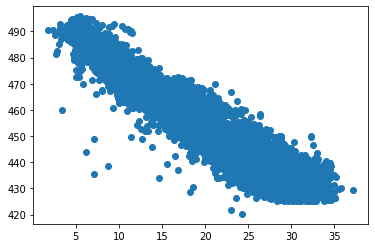

In [13]:
# draw a scatter plot diagram
# The x-axis represents AT, and the y-axis represents PE.
plt.scatter(data['AT'],data['PE'])

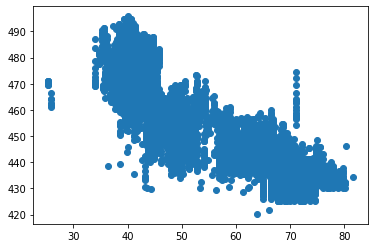

In [14]:
# draw a scatter plot diagram
# The x-axis represents V, and the y-axis represents PE.
plt.scatter(data['V'],data['PE'])

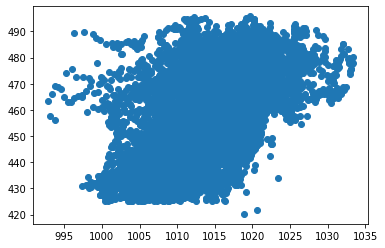

In [15]:
# draw a scatter plot diagram
# The x-axis represents AP, and the y-axis represents PE.
plt.scatter(data['AP'],data['PE'])

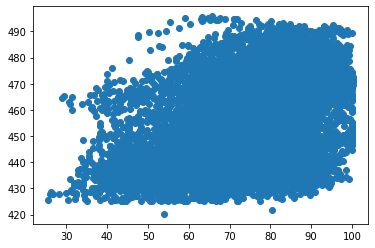

In [16]:
# draw a scatter plot diagram
# The x-axis represents RH, and the y-axis represents PE.
plt.scatter(data['RH'],data['PE'])

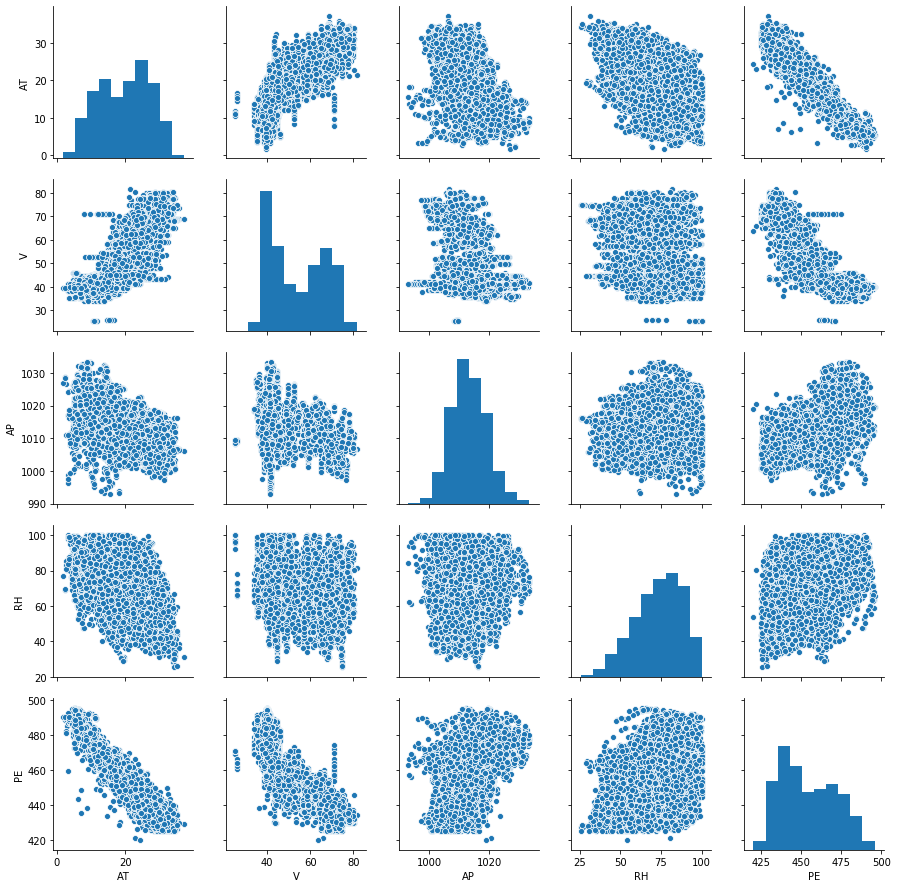

In [17]:
# The pairplot function creates a grid of Axes such that each variable
# in data will by shared in the y-axis across a single row and in the x-axis across a single column.
sns.pairplot(data, diag_kind = 'hist')

In [18]:
# dividing the data into input and output
x=data.drop(['PE'],axis=1)
y=data['PE']

In [19]:
# importing the train_test_split from scikit-learn
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [20]:
# Returns size of xtrain 
xtrain.shape

(7654, 4)

In [21]:
# Returns size of xtest 
xtest.shape

(1914, 4)

In [22]:
# Linear Regression
from sklearn.linear_model import LinearRegression
# Initializing the model
LRmodel = LinearRegression()

In [23]:
# Train the data with Linear Regreesion model
LRmodel.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
LRpred=LRmodel.predict(xtest)

In [25]:
# Importing R Square library
from sklearn.metrics import r2_score

In [26]:
# Checking for accuracy score with actual data and predicted data
LRscore=r2_score(ytest, LRpred)
LRscore

0.9325315554761302

In [27]:
# Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor
# Intializing the model
DTRmodel=DecisionTreeRegressor()

In [28]:
# Train the data with Linear Regreesion model
DTRmodel.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [29]:
DTRpred=DTRmodel.predict(xtest)

In [30]:
# Checking for accuracy score with actual data and predicted data
DTRscore=r2_score(ytest, DTRpred)
DTRscore

0.9209724295350512

In [31]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Initializing the model
RFmodel=RandomForestRegressor()

In [32]:
# Train the data with Random Forest model
RFmodel.fit(xtrain, ytrain)

C:\Users\Route\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
RFpred=RFmodel.predict(xtest)

In [34]:
# Checking for accuracy score with actual data and predicted data
RFscore=r2_score(ytest, RFpred)
RFscore

0.9596159451654834

In [35]:
# saving the model
pickle.dump(RFmodel, open('CCPP.pkl','wb'))